In [6]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

In [5]:
# load nes_info
guchio_df = pd.read_csv('../mnt/submissions/e036_e034_plus_e035_2019-04-01-16-40-50_0.92275_sub.csv.gz')
graseck_df = pd.read_csv('../mnt/submissions/sub_pa_lgb_F1000_30.03.2019-18_54__0.92072_MCC0.5882.csv')
naggis_df = pd.read_csv('../mnt/submissions/nagis_sub1.csv')

reals = np.load('../mnt/inputs/nes_info/real_samples_indexes.npz.npy')
fakes = np.load('../mnt/inputs/nes_info/synthetic_samples_indexes.npz.npy')
publics = np.load('../mnt/inputs/nes_info/public_LB.npz.npy')
privates = np.load('../mnt/inputs/nes_info/private_LB.npz.npy')

In [7]:
publics

array([131076, 131078,      7, ..., 131063, 131065, 131069])

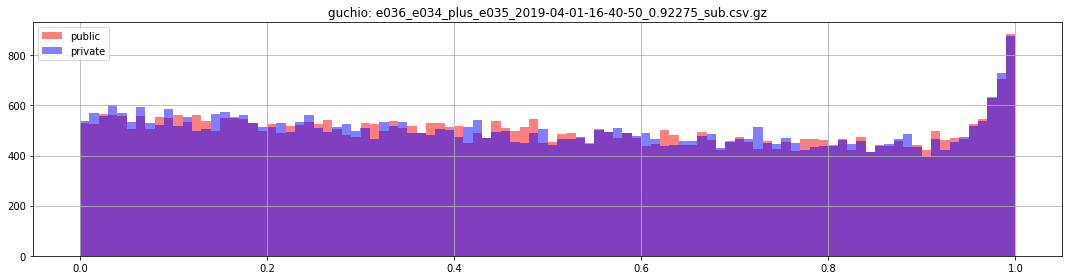

In [9]:
# guchio

plt.figure(figsize=(15, 4))
guchio_df.iloc[publics].target.hist(alpha=0.5, color='r', bins=100, label='public')
guchio_df.iloc[privates].target.hist(alpha=0.5, color='b', bins=100, label='private')
plt.title('guchio: e036_e034_plus_e035_2019-04-01-16-40-50_0.92275_sub.csv.gz')
plt.legend()
plt.tight_layout()

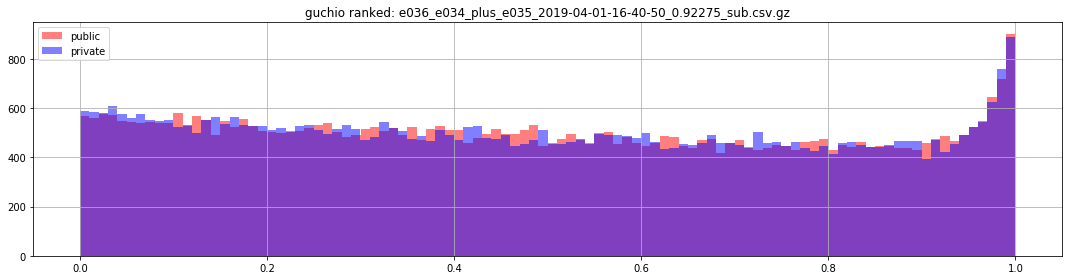

In [29]:
# guchio

plt.figure(figsize=(15, 4))
(guchio_df.target.rank() / guchio_df.shape[0]).iloc[publics].hist(alpha=0.5, color='r', bins=100, label='public')
(guchio_df.target.rank() / guchio_df.shape[0]).iloc[privates].hist(alpha=0.5, color='b', bins=100, label='private')
plt.title('guchio ranked: e036_e034_plus_e035_2019-04-01-16-40-50_0.92275_sub.csv.gz')
plt.legend()
plt.tight_layout()

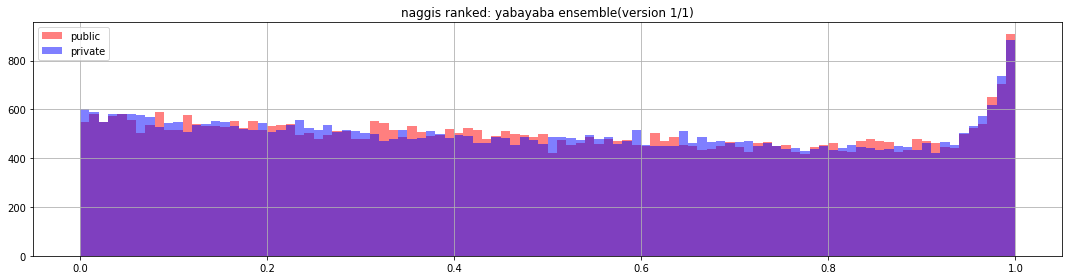

In [30]:
# naggis

plt.figure(figsize=(15, 4))
(naggis_df.target.rank() / naggis_df.shape[0]).iloc[publics].hist(alpha=0.5, color='r', bins=100, label='public')
(naggis_df.target.rank() / naggis_df.shape[0]).iloc[privates].hist(alpha=0.5, color='b', bins=100, label='private')
# naggis_df.iloc[publics].target.hist(alpha=0.5, color='r', bins=100, label='public')
# naggis_df.iloc[privates].target.hist(alpha=0.5, color='b', bins=100, label='private')
plt.title('naggis ranked: yabayaba ensemble(version 1/1)')
plt.legend()
plt.tight_layout()

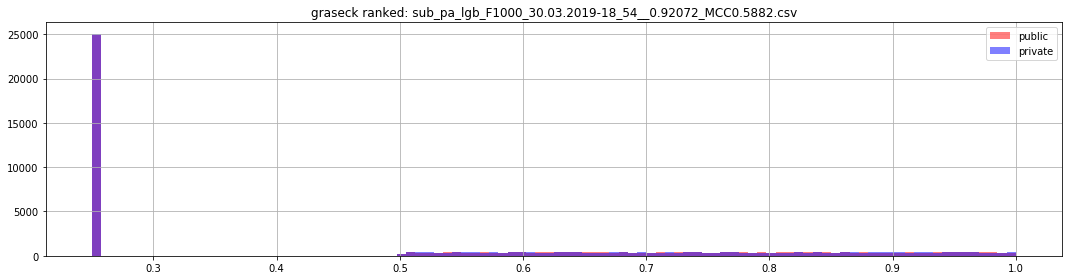

In [31]:
# garaseck
plt.figure(figsize=(15, 4))
(graseck_df.target.rank() / graseck_df.shape[0]).iloc[publics].hist(alpha=0.5, color='r', bins=100, label='public')
(graseck_df.target.rank() / graseck_df.shape[0]).iloc[privates].hist(alpha=0.5, color='b', bins=100, label='private')
plt.title('graseck ranked: sub_pa_lgb_F1000_30.03.2019-18_54__0.92072_MCC0.5882.csv')
plt.legend()
plt.tight_layout()

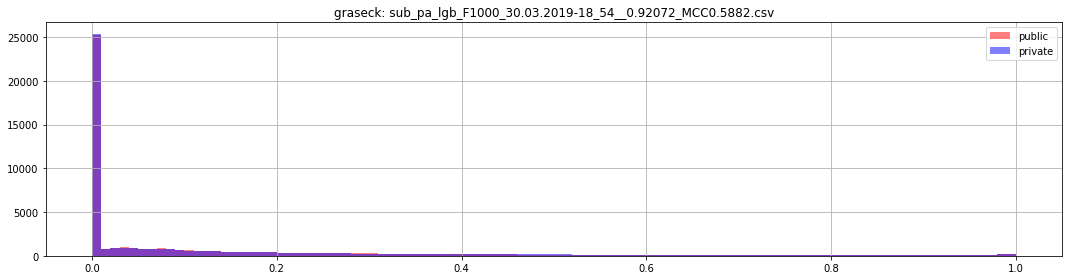

In [24]:
# graseck

plt.figure(figsize=(15, 4))
#plt.xlim([0.01, 1.])
#plt.ylim([0., 800.])
graseck_df.iloc[publics].target.hist(alpha=0.5, color='r', bins=100, label='public')
graseck_df.iloc[privates].target.hist(alpha=0.5, color='b', bins=100, label='private')
plt.title('graseck: sub_pa_lgb_F1000_30.03.2019-18_54__0.92072_MCC0.5882.csv')
plt.legend()
plt.tight_layout()

In [41]:
reals.shape[0]

(100000,)

In [39]:
a = np.array(list(set(reals) & set(publics)))
a.shape

(50000,)

In [42]:
real_publics = np.array(list(set(reals) & set(publics)))
real_privates = np.array(list(set(reals) & set(privates)))

In [48]:
guchio_df['real'] = np.nan
guchio_df['public'] = np.nan
guchio_df['private'] = np.nan
guchio_df.iloc[reals, 2] = True
guchio_df.iloc[publics, 3] = True
guchio_df.iloc[privates, 4] = True
guchio_df.head()

,ID_code,target,real,public,private
0,test_0,0.702090,NaN,NaN,NaN
1,test_1,0.896838,NaN,NaN,NaN
2,test_2,0.888396,NaN,NaN,NaN
3,test_3,0.811042,True,NaN,True
4,test_4,0.728153,NaN,NaN,NaN


/root/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


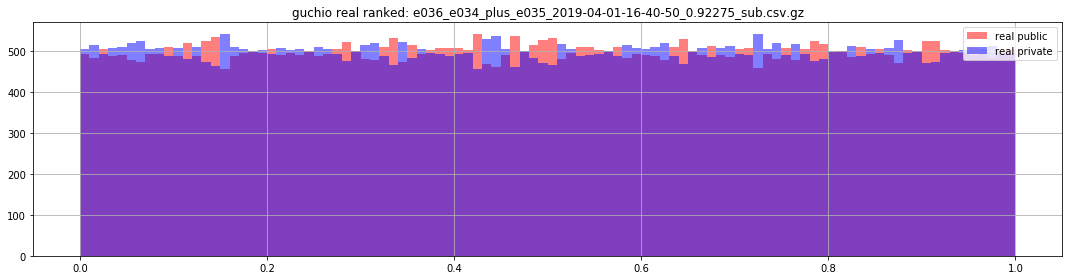

In [49]:
# guchio

guchio_df['real'] = np.nan
guchio_df['public'] = np.nan
guchio_df['private'] = np.nan
guchio_df.iloc[reals, 2] = True
guchio_df.iloc[publics, 3] = True
guchio_df.iloc[privates, 4] = True
real_guchio_df = guchio_df.query('real == True')
real_guchio_df.target = real_guchio_df.target.rank() / real_guchio_df.shape[0]

plt.figure(figsize=(15, 4))
real_guchio_df.query('public == True').target.hist(alpha=0.5, color='r', bins=100, label='real public')
real_guchio_df.query('private == True').target.hist(alpha=0.5, color='b', bins=100, label='real private')
plt.title('guchio real ranked: e036_e034_plus_e035_2019-04-01-16-40-50_0.92275_sub.csv.gz')
plt.legend()
plt.tight_layout()

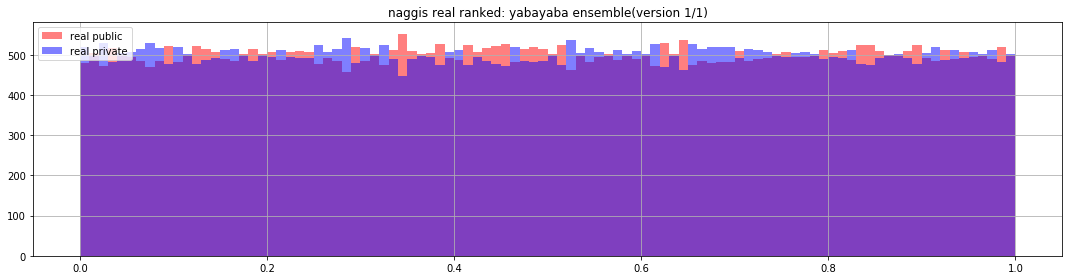

In [50]:
# naggis

naggis_df['real'] = np.nan
naggis_df['public'] = np.nan
naggis_df['private'] = np.nan
naggis_df.iloc[reals, 2] = True
naggis_df.iloc[publics, 3] = True
naggis_df.iloc[privates, 4] = True
real_naggis_df = naggis_df.query('real == True')
real_naggis_df.target = real_naggis_df.target.rank() / real_naggis_df.shape[0]

plt.figure(figsize=(15, 4))
real_naggis_df.query('public == True').target.hist(alpha=0.5, color='r', bins=100, label='real public')
real_naggis_df.query('private == True').target.hist(alpha=0.5, color='b', bins=100, label='real private')
plt.title('naggis real ranked: yabayaba ensemble(version 1/1)')
plt.legend()
plt.tight_layout()

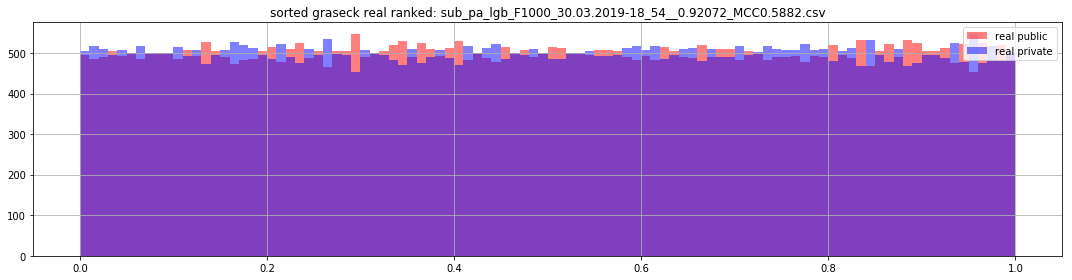

In [63]:
# graseck
graseck_df = graseck_df.set_index('ID_code').loc[guchio_df.ID_code].reset_index()
graseck_df['real'] = np.nan
graseck_df['public'] = np.nan
graseck_df['private'] = np.nan
graseck_df.iloc[reals, 2] = True
graseck_df.iloc[publics, 3] = True
graseck_df.iloc[privates, 4] = True
real_graseck_df = graseck_df.query('real == True')
real_graseck_df.target = real_graseck_df.target.rank() / real_graseck_df.shape[0]

plt.figure(figsize=(15, 4))
real_graseck_df.query('public == True').target.hist(alpha=0.5, color='r', bins=100, label='real public')
real_graseck_df.query('private == True').target.hist(alpha=0.5, color='b', bins=100, label='real private')
plt.title('sorted graseck real ranked: sub_pa_lgb_F1000_30.03.2019-18_54__0.92072_MCC0.5882.csv')
plt.legend()
plt.tight_layout()

In [56]:
np.array([1, 2, 3]) / reals.shape

array([1.e-05, 2.e-05, 3.e-05])

In [53]:
reals[:2] = 0
reals

array([     0,      0,     11, ..., 199995, 199996, 199999])

In [54]:
reals[[10, 100, 1000]]

array([  24,  218, 1991])

In [58]:
pd.Series(reals).iloc[[10, 100, 1000]]

10        24
100      218
1000    1991
dtype: int64